In [14]:
# Connect to client and select SkySpark database
from influxdb import InfluxDBClient
client = InfluxDBClient(host='206.12.88.106', port=8086)
client.switch_database('skyspark')

In [34]:
# Sample query (The past 10 temperature readings from CIRS Room 3131)
result = client.query('SELECT * FROM "UBC_EWS" WHERE "typeRef"=\'CIRS_L3N_RAD_BLDG_SIM_1_SW_RT_AV\' LIMIT 10')

In [51]:
# Parse json response 
import json
json_output = result.raw
data = []
timestamps = []
for val in json_output['series'][0]['values']:
    timestamps.append(val[0])
    data.append(val[-1])

In [93]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(data = data, index = timestamps, 
                  columns = ['CIRS '+json_output['series'][0]['values'][0][1]])

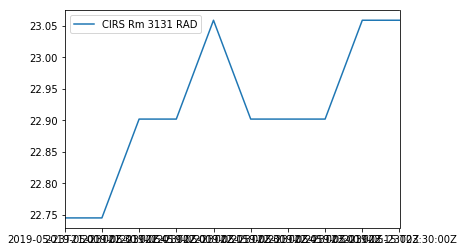

In [94]:
df.plot()